# PID Control with Bumpless Transfers

### Switching from Manual to Automatic Control

In [6]:
#Define function
def PID(Kp, Ki, Kd, MV_bar=0, beta=1, gamma=0):
    # initialize stored data
    eD_prev = 0
    t_prev = -100
    I = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        t, SP, PV = yield MV
        
        # PID calculations
        P = Kp*(beta*SP-PV)
        I = I + Ki*(SP-PV)*(t-t_prev)
        eD = gamma*SP-PV
        D = Kd*(eD-eD_prev)/(t-t_prev)
        MV = MV_bar+P+I+D
        
        # update for naxt iteration
        eD_prev = eD
        t_prev = t

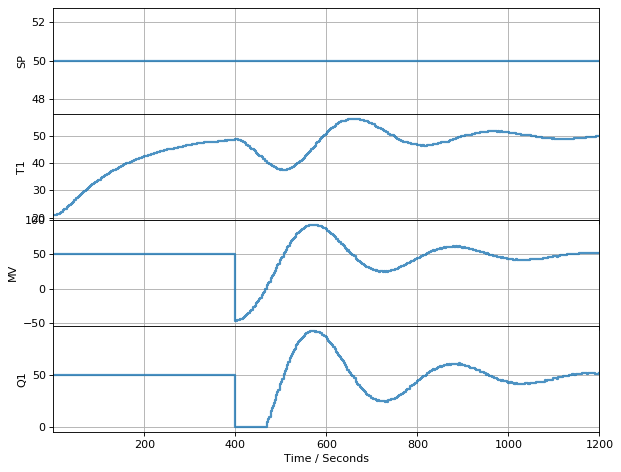

TCLab Model disconnected successfully.


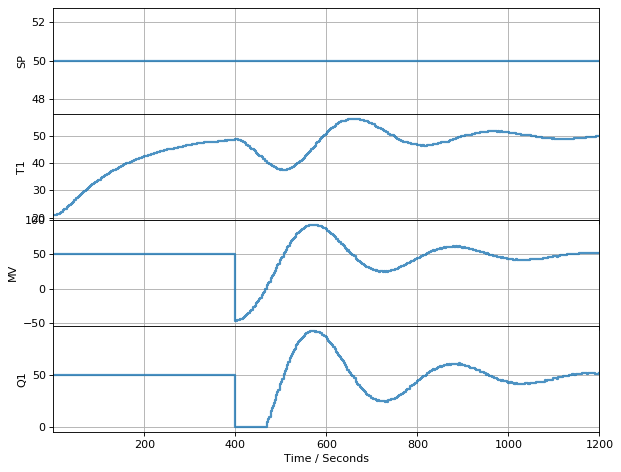

In [7]:
# run for test bumpless
%matplotlib inline
from tclab import clock,setup,Historian,Plotter

TCLab = setup(connected=False ,speedup=10)
controller = PID(2, 0.1, 2, beta=0) # create pid control call pid function
controller.send(None) # initialize

t_final = 1200
SP = 50

with TCLab() as lab:
    h = Historian([('SP',lambda:SP), ('T1',lambda:lab.T1),('MV',lambda:MV),('Q1',lab.Q1)])
    p = Plotter(h, t_final)
    for t in clock(t_final,2):
        PV = lab.T1
        if t < 400:
            MV = 50
        else:
            MV = controller.send([t,SP,PV])
        lab.U1 = MV
        p.update(t)

### Tracking the Manipulated Variable

In [1]:
# PID controller
def PID(Kp, Ki, Kd, MV_bar=0, beta=1, gamma=0):
    # initialize stored data
    eD_prev = 0
    t_prev = -100
    P = 0
    I = 0
    D = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        #yield MV, wait for new t, SP, PV, TR
        t, SP, PV, TR = yield MV
        
        #adjust I term so output matches tracking input
        I = TR - MV_bar - P - D
        
        #PID calculations
        P = Kp*(beta*SP-PV)
        I = I + Ki*(SP-PV)*(t-t_prev)
        eD = gamma*SP-PV
        D = Kd*(eD-eD_prev)/(t-t_prev)
        MV = MV_bar + P + I + D
        
        #update stored data for next iteration
        eD_prev = eD
        t_prev = t

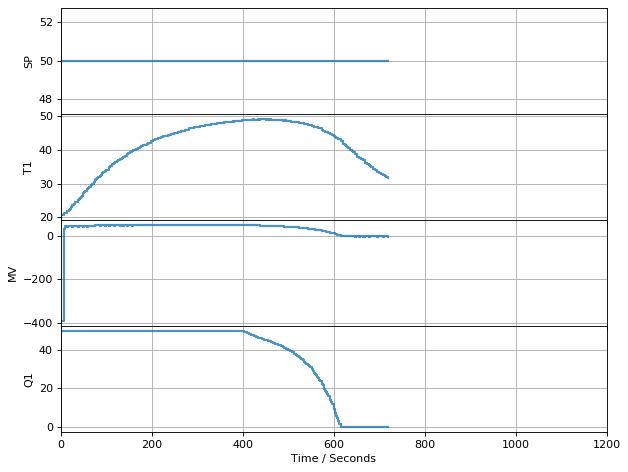

In [ ]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

TCLab = setup(connected = False, speedup =10)

controller = PID(2, 0.1, 2, beta=0) # create PID control
controller.send(None) # initialize

t_final = 1200
SP = 50

with TCLab() as lab:
    h = Historian([('SP', lambda:SP),('T1',lambda:lab.T1),('MV',lambda:MV),('Q1',lab.Q1)])
    p = Plotter(h, tfinal)
    for t in clock(t_final, 2):
        PV = lab.T1
        MV = controller.send([t,PV,SP,lab.Q1()])
        if t < 400:
            lab.U1 = 50
        else:
            lab.U1 = MV # compute control action
        p.update(t)
